In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/UmerBhikan/Predicting-sales-of-Tractors-Time-Series-/master/Tractor-Sales.csv")

In [ ]:
df.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [ ]:
!pip uninstall -y pandas-profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6c594c3b276648e917bf3d3f4e96a02fd5284a41aac84daa7b43604629bd2c18
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Unin

In [ ]:
pf=ProfileReport(df)

In [ ]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pf.to_file("test.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.describe()

,Number of Tractor Sold
count,144.000000
mean,389.694444
std,171.500016
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


In [ ]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(df))

In [ ]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [ ]:
df['year']=dates.year

In [ ]:
df['month']=dates.month

In [ ]:
df.set_index(dates,inplace=True)

In [ ]:
df.head()

,Month-Year,Number of Tractor Sold,year,month
2003-01-01,Jan-03,141,2003,1
2003-02-01,Feb-03,157,2003,2
2003-03-01,Mar-03,185,2003,3
2003-04-01,Apr-03,199,2003,4
2003-05-01,May-03,203,2003,5


In [ ]:
df.rename(columns={'Number of Tractor Sold': 'TractorSales'},inplace=True)

In [ ]:
import calendar
calendar.month_abbr[1]

'Jan'

In [ ]:
df['Month']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
ts_sales=df['TractorSales']

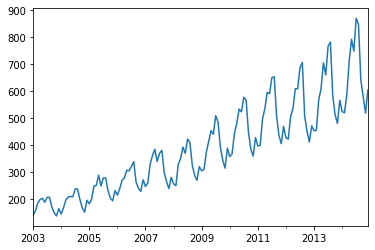

In [ ]:
ts_sales.plot()

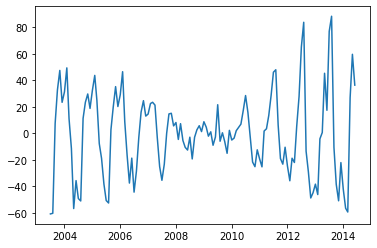

In [ ]:
# decompose
decompose= seasonal_decompose(ts_sales)
plt.plot(decompose.resid)

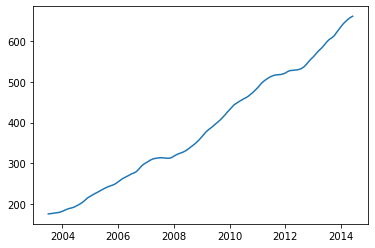

In [ ]:
plt.plot(decompose.trend)

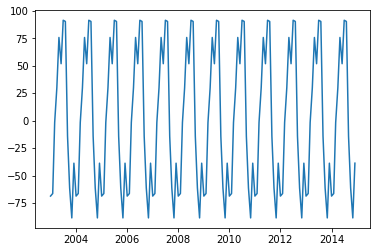

In [ ]:
plt.plot(decompose.seasonal)

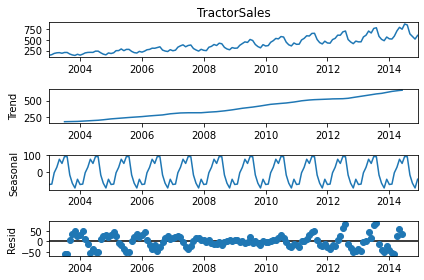

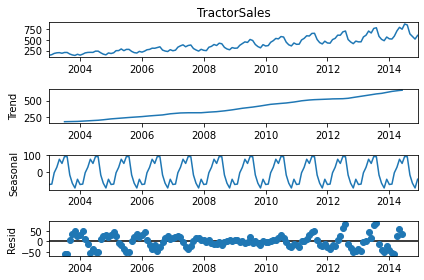

In [ ]:
decompose.plot()

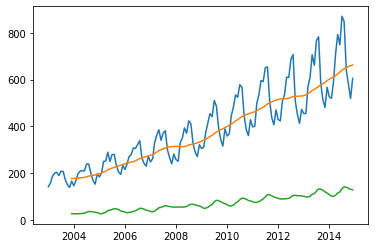

In [ ]:
# Rolling Statistics- smoothening of data
# Simple moving average
plt.plot(ts_sales)
plt.plot(ts_sales.rolling(window=12).mean())
plt.plot(ts_sales.rolling(window=12).std())

In [ ]:
df1=pd.pivot(df,values="TractorSales",index='Month',columns='year')

In [ ]:
df1.head()

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525


In [ ]:
df1.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


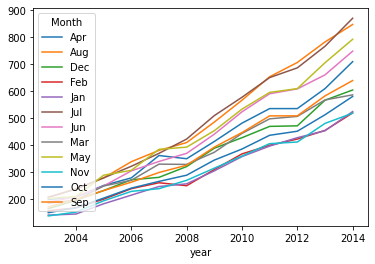

In [ ]:
df1.plot()

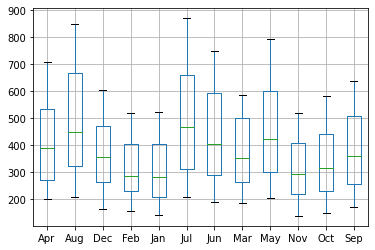

In [ ]:
pd.pivot(df,values="TractorSales",index='year',columns='Month').boxplot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


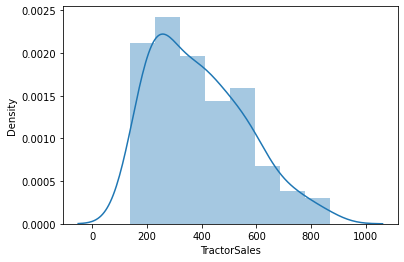

In [ ]:
sns.distplot(ts_sales)

In [ ]:
adfuller(ts_sales)

(1.1088250591467341,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

The first value (1.1088250591467341) is the test statistic, the second value (0.9952912415248419) is the p-value, the third and fourth values (14 and 129) represent the number of lags and observations used in the test, respectively. The fifth value is a dictionary containing the critical values for different levels of significance (1%, 5%, and 10%). The last value (1082.5357724796872) is the maximum eigenvalue of the residuals covariance matrix.

The p-value is greater than 0.05, which means that we cannot reject the null hypothesis that there is a unit root in the time series. This suggests that the time series is non-stationary and has a trend or a unit root.

The test statistic is greater than the critical values at 1%, 5%, and 10% levels of significance. This further confirms that the time series is non-stationary.

In [ ]:
def test_stationary(timeseries):
  rolmean=ts_sales.rolling(12).mean()
  rolstd=ts_sales.rolling(12).std()
  plt.figure(figsize=(16,8))
  plt.grid('both')
  plt.plot(ts_sales)
  plt.plot(rolmean)
  plt.plot(rolstd)

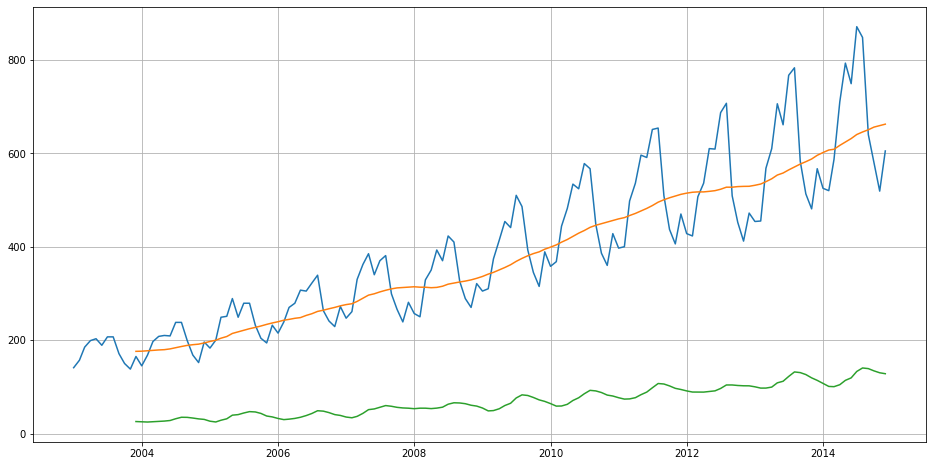

In [ ]:
test_stationary(ts_sales)

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

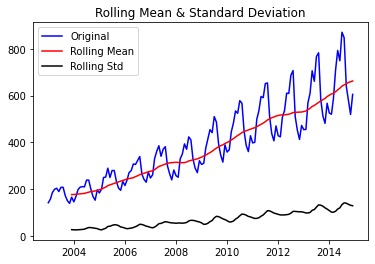

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#Lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [ ]:
test_stationarity(ts_sales)

In [ ]:
one_diff_data=ts_sales.diff(periods=1)

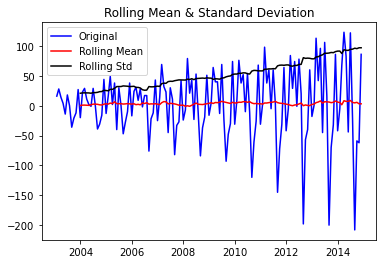

Results of Dickey-Fuller Test:


MissingDataError: ignored

In [ ]:
test_stationarity(one_diff_data)

In [ ]:
log_diff_data=np.log(ts_sales).diff(periods=2).dropna()

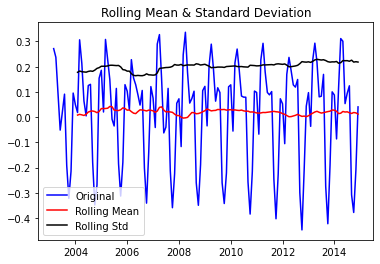

Results of Dickey-Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(log_diff_data)

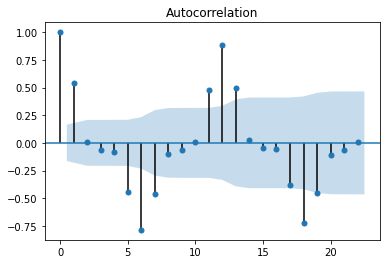

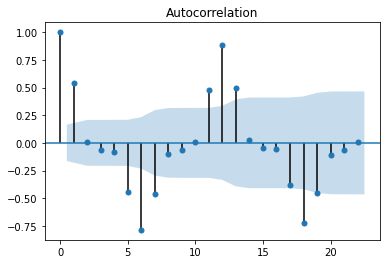

In [ ]:
smt.graphics.plot_acf(log_diff_data)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


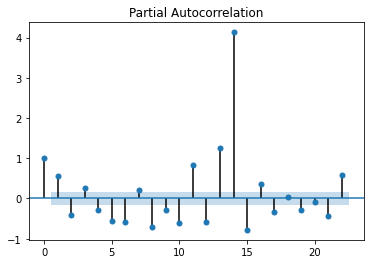

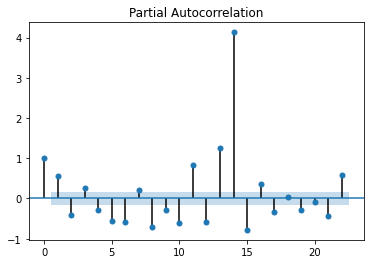

In [ ]:
smt.graphics.plot_pacf(log_diff_data)

In [ ]:
model=ARIMA(data,order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.TractorSales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -771.417
Method:                       css-mle   S.D. of innovations             53.121
Date:                Thu, 12 Jan 2023   AIC                           1550.834
Time:                        19:33:22   BIC                           1562.686
Sample:                    02-01-2003   HQIC                          1555.650
                         - 12-01-2014                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.4872      5.224      0.668      0.504      -6.751      13.726
ar.L1.D.TractorSales    -0.6523      0.077     -8.485      0.000      -0.803      -0.502
ma.L1.D.Trac

In [ ]:
model = SARIMAX(data, order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       TractorSales   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -559.231
Date:                            Thu, 12 Jan 2023   AIC                           1126.461
Time:                                    19:34:00   BIC                           1137.962
Sample:                                01-01-2003   HQIC                          1131.134
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1482      0.346     -0.429      0.668      -0.826       0.529
ma.L1         -0.1536      0.327   

In [ ]:
data=ts_sales

In [ ]:
np.sqrt(mean_squared_error(y,prediction))

NameError: ignored

ARIMA
p,d,q
p=auto regression
d=differencing
q=moving average

In [ ]:
len(train_data)

120

In [ ]:
len(test_data)

22

In [ ]:
len(log_diff_data)

142

In [ ]:
def arima_model(X,y,arima_order):
    history=[i for i in X]
    prediction=list()
    for i in range(len(y)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[1]
        prediction.append(yhat)
        history.append(y[i])
    mse=np.sqrt(mean_squared_error(y,prediction))
    return mse

In [ ]:
def evalute_arima_model(dataset,test,p_value,d_value,q_value):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for i in p_value:
        for j in d_value:
            for k in q_value:
                order=(i,j,k)
               
                try:
                    rmse=arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA%s, RMSE=%.3f" %(order,rmse))
                except Exception as e:
                    print(e)
                    print("error")
                    continue
            
    print(f"best_score and best_cfg {best_score}{best_cfg}")

In [ ]:
p_value=range(0,2)
d_value=range(0,2)
q_value=range(0,2)

In [ ]:
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 0), RMSE=0.278
ARIMA(0, 0, 1), RMSE=0.244
ARIMA(0, 1, 0), RMSE=0.273
ARIMA(0, 1, 1), RMSE=0.270
ARIMA(1, 0, 0), RMSE=0.260
ARIMA(1, 0, 1), RMSE=0.244
ARIMA(1, 1, 0), RMSE=0.273
ARIMA(1, 1, 1), RMSE=0.258
best_score and best_cfg 0.2437207224604798(1, 0, 1)


In [ ]:
len(ts_sales)
#12 months
#last two year data as a test data
#24
144-24

120

In [ ]:
log_diff_data.dtype

dtype('float64')

In [ ]:
train_data=log_diff_data[:120]

In [ ]:
test_data=log_diff_data[120:]

In [ ]:
train_data
print(len(train_data))

120


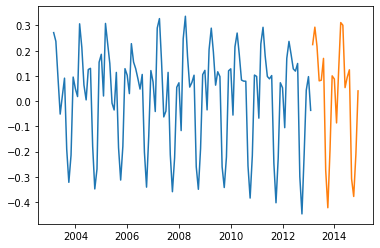

In [ ]:
plt.plot(train_data)
plt.plot(test_data)

In [ ]:
plt.plot(history)
plt.plot(prediction)

NameError: ignored

In [ ]:
data=[i for i in train_data]

In [ ]:
data

[0.27159593470015597,
 0.23705901937618457,
 0.09285015396346274,
 -0.051557809664849685,
 0.019512814223581643,
 0.09097177820572622,
 -0.19105523676270852,
 -0.3220834991691133,
 -0.2144098713454552,
 0.09531017980432477,
 0.049480057263369126,
 0.018018505502678472,
 0.3064699863174143,
 0.21357410029805912,
 0.06390380197947998,
 0.004796172263493048,
 0.12516314295400655,
 0.12993642170666408,
 -0.17896584894698275,
 -0.34830669426821625,
 -0.2694243038782158,
 0.15415067982725805,
 0.1856056319951449,
 0.020202707317519497,
 0.307966743623286,
 0.22713557258374717,
 0.14897379164772495,
 -0.008000042667076102,
 -0.03521490629106694,
 0.11375888535665801,
 -0.1844744101550555,
 -0.3130917879771493,
 -0.17887921260298167,
 0.12861737782209381,
 0.10277986906433423,
 0.02972618026520113,
 0.22778393087071258,
 0.15474822988985437,
 0.1284257885888218,
 0.08909999478604647,
 0.04770379795721169,
 0.10568833077303807,
 -0.2023975133666438,
 -0.34120317388979515,
 -0.13843202862352477,

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data,order=(3,1,1))

In [ ]:
len(data)

120

In [ ]:
original=log_diff_data[120]

In [ ]:
m_fit=model.fit()

In [ ]:
m_fit.bic

-75.59925713686302

In [ ]:
predict=m_fit.forecast()

In [ ]:
m_fit.forecast()[0][0]

-0.06756132525048268

In [ ]:
test_data

2013-03-01    0.224024
2013-04-01    0.293162
2013-05-01    0.217494
2013-06-01    0.080295
2013-07-01    0.082872
2013-08-01    0.169379
2013-09-01   -0.274300
2013-10-01   -0.422857
2013-11-01   -0.192320
2013-12-01    0.100083
2014-01-01    0.087531
2014-02-01   -0.086530
2014-03-01    0.111627
2014-04-01    0.311436
2014-05-01    0.300798
2014-06-01    0.053474
2014-07-01    0.093819
2014-08-01    0.124142
2014-09-01   -0.308174
2014-10-01   -0.378130
2014-11-01   -0.209564
2014-12-01    0.040478
Freq: MS, Name: TractorSales, dtype: float64

In [ ]:
evalute_arima_model(train_data,test_data,p_value,d_value,q_value)

ARIMA(0, 0, 0), RMSE=0.278
ARIMA(0, 0, 1), RMSE=0.244
ARIMA(0, 1, 0), RMSE=0.273
ARIMA(0, 1, 1), RMSE=0.270
ARIMA(1, 0, 0), RMSE=0.260
ARIMA(1, 0, 1), RMSE=0.244
ARIMA(1, 1, 0), RMSE=0.273
ARIMA(1, 1, 1), RMSE=0.258
best_score and best_cfg 0.2437207224604798(1, 0, 1)


In [ ]:
history=[i for i in train_data]
prediction=list()
for i in range(len(test_data)):
        model=ARIMA(history,order=(1,0,1))
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(test_data[i])